In [16]:
import sys,os,glob
import shutil
from glob import glob
from astropy.io import fits
from astropy.table import Table
from astropy.nddata import extract_array
from astropy.coordinates import SkyCoord
from astropy import wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from astropy.visualization import (simple_norm,LinearStretch)

import jhat
from jhat import jwst_photclass,st_wcs_align
from jhat import st_wcs_align_batch

In [20]:
from jhat import align_wcs_batch

In [2]:
os.environ["CRDS_PATH"] = "/orange/adamginsburg/jwst/brick/crds/"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [3]:
files = glob("/orange/adamginsburg/jwst/cloudc/F405N/pipeline/*align_cal.fits")
files

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00003_nrcalong_align_cal.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00001_nrcalong_align_cal.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_align_cal.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00001_nrcalong_align_cal.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcalong_align_cal.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_02201_00002_nrcalong_align_cal.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00004_nrcalong_align_cal.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00002_nrcalong_align_cal.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00002_nrcalong_align_cal.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalo

In [14]:
file = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_tweakregstep.fits'
ofile = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak.fits'
imfile = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_copy.fits'
shutil.copy(ofile, imfile)

'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_copy.fits'

In [21]:
wcs.WCS(fits.getheader(file, ext=1))

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 266.59305344716  -28.55541708394  
CRPIX : 1024.5  1024.5  
CD1_1 CD1_2  : -1.6103367948909e-06  -1.74418950742e-05  
CD2_1 CD2_2  : -1.7359959867296e-05  1.6457580296555e-06  
NAXIS : 2048  2048

In [15]:
ref_image=file
align_image=imfile

In [9]:
jwst_phot = jwst_photclass()
jwst_phot.run_phot(imagename=ref_image,photfilename='auto',overwrite=True,ee_radius=80)
ref_catname = ref_image.replace('.fits','.phot.txt') # the default
refcat = Table.read(ref_catname,format='ascii')
print(refcat)

0 /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_tweakregstep.phot.txt


2023-08-25 11:49:07,215 - stpipe.SourceCatalogStep - INFO - SourceCatalogStep instance created.
2023-08-25 11:49:07,917 - stpipe.SourceCatalogStep - INFO - Using APCORR reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_apcorr_0004.fits
2023-08-25 11:49:07,930 - stpipe.SourceCatalogStep - INFO - Using ABVEGAOFFSET reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_abvegaoffset_0001.asdf
2023-08-25 11:49:07,931 - stpipe - INFO - Instrument: NIRCAM
2023-08-25 11:49:07,933 - stpipe - INFO - Detector: NRCALONG
2023-08-25 11:49:07,934 - stpipe - INFO - Filter: F444W
2023-08-25 11:49:07,935 - stpipe - INFO - Pupil: F405N
2023-08-25 11:49:07,936 - stpipe - INFO - Subarray: FULL
2023-08-25 11:49:07,976 - stpipe - WARNING - model.meta.resample.pixel_scale_ratio was not found. Assuming the native detector pixel scale (i.e., pixel_scale_ratio = 1)


aper_sum_4.2px annulus_median_4.2px aper_bkg_4.2px aper_sum_bkgsub_4.2px flux_err_4.2px    mag    ... roundness2     ra        dec       x_idl      y_idl   
-------------- -------------------- -------------- --------------------- -------------- --------- ... ---------- ---------- ---------- ---------- ----------
    415.205103             5.342843     292.994289            159.778417       0.118225 20.974772 ...   0.248911 266.615055 -28.540147 -61.253611 -64.103405
    650.768503              7.90359       433.4222            284.158554       0.126104 20.349665 ...  -0.404545 266.614635 -28.544481  -45.59542 -64.243226
    458.120292             3.980252     218.271659            313.578099       0.122449 20.242703 ...  -0.194865 266.614507 -28.545801  -40.82792  -64.28482
    711.584859             8.706406     477.447513            306.111163       0.129006 20.268869 ...   0.054078  266.61433 -28.547655 -34.129685 -64.353241
    757.737184             7.565804     414.898475        

In [23]:
wcs_align??

Type:        align_wcs_batch
String form: <jhat.st_wcs_align_batch.align_wcs_batch object at 0x152aeed8d9a0>
File:        /blue/adamginsburg/adamginsburg/miniconda3/envs/python39savannah/lib/python3.9/site-packages/jhat/st_wcs_align_batch.py
Source:     
class align_wcs_batch(pdastroclass):
    def __init__(self):
        pdastroclass.__init__(self)

        self.verbose=0
        self.debug = False
        
        self.outdir = None
        
        
        self.aperture_col = 'AperName'
        self.detector_col = 'detector'
        self.filter_col = 'filter'
        self.pupil_col = 'pupil'

        
        self.wcs_align = st_wcs_align()

    def define_options(self,parser=None,usage=None,conflict_handler='resolve'):
        if parser is None:
            parser = argparse.ArgumentParser(usage=usage,conflict_handler=conflict_handler)
        
        # default directory for input images
        if 'JWST_INPUT_IMAGEDIR' in os.environ:
            inputdir = os.environ['JWST_INPUT

In [21]:
wcs_align = align_wcs_batch()

In [30]:
wcs_align.align_wcs(ixs=['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/*align_cal.fits'],
                   telescope='jwst',
                   refcatname='/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits',
                   refcat_racol='ra',
                   refcat_deccol='dec',
                   refcat_magcol='mag',
                   refcat_magerrcol='dmag',
                   histocut_order='dxdy',
                   sharpness_lim=(0.3,0.9),
                   roundness1_lim=(-0.25, 0.25),
                   SNR_min= 10,
                   dmag_max=1.0,)

KeyError: "None of [Index(['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/*align_cal.fits'], dtype='object')] are in the [index]"

0 ./jw02221002002_02201_00004_nrcalong_destreak_copy.phot.txt


2023-08-25 12:32:28,697 - stpipe.SourceCatalogStep - INFO - SourceCatalogStep instance created.
2023-08-25 12:32:28,984 - stpipe.SourceCatalogStep - INFO - Using APCORR reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_apcorr_0004.fits
2023-08-25 12:32:28,997 - stpipe.SourceCatalogStep - INFO - Using ABVEGAOFFSET reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_abvegaoffset_0001.asdf
2023-08-25 12:32:28,998 - stpipe - INFO - Instrument: NIRCAM
2023-08-25 12:32:28,999 - stpipe - INFO - Detector: NRCALONG
2023-08-25 12:32:29,000 - stpipe - INFO - Filter: F444W
2023-08-25 12:32:29,001 - stpipe - INFO - Pupil: F405N
2023-08-25 12:32:29,003 - stpipe - INFO - Subarray: FULL
2023-08-25 12:32:29,037 - stpipe - WARNING - model.meta.resample.pixel_scale_ratio was not found. Assuming the native detector pixel scale (i.e., pixel_scale_ratio = 1)


LOADING refcat /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_02201_00004_nrcalong_destreak_tweakregstep.phot.txt
ra
*** Note: close plot to continue!


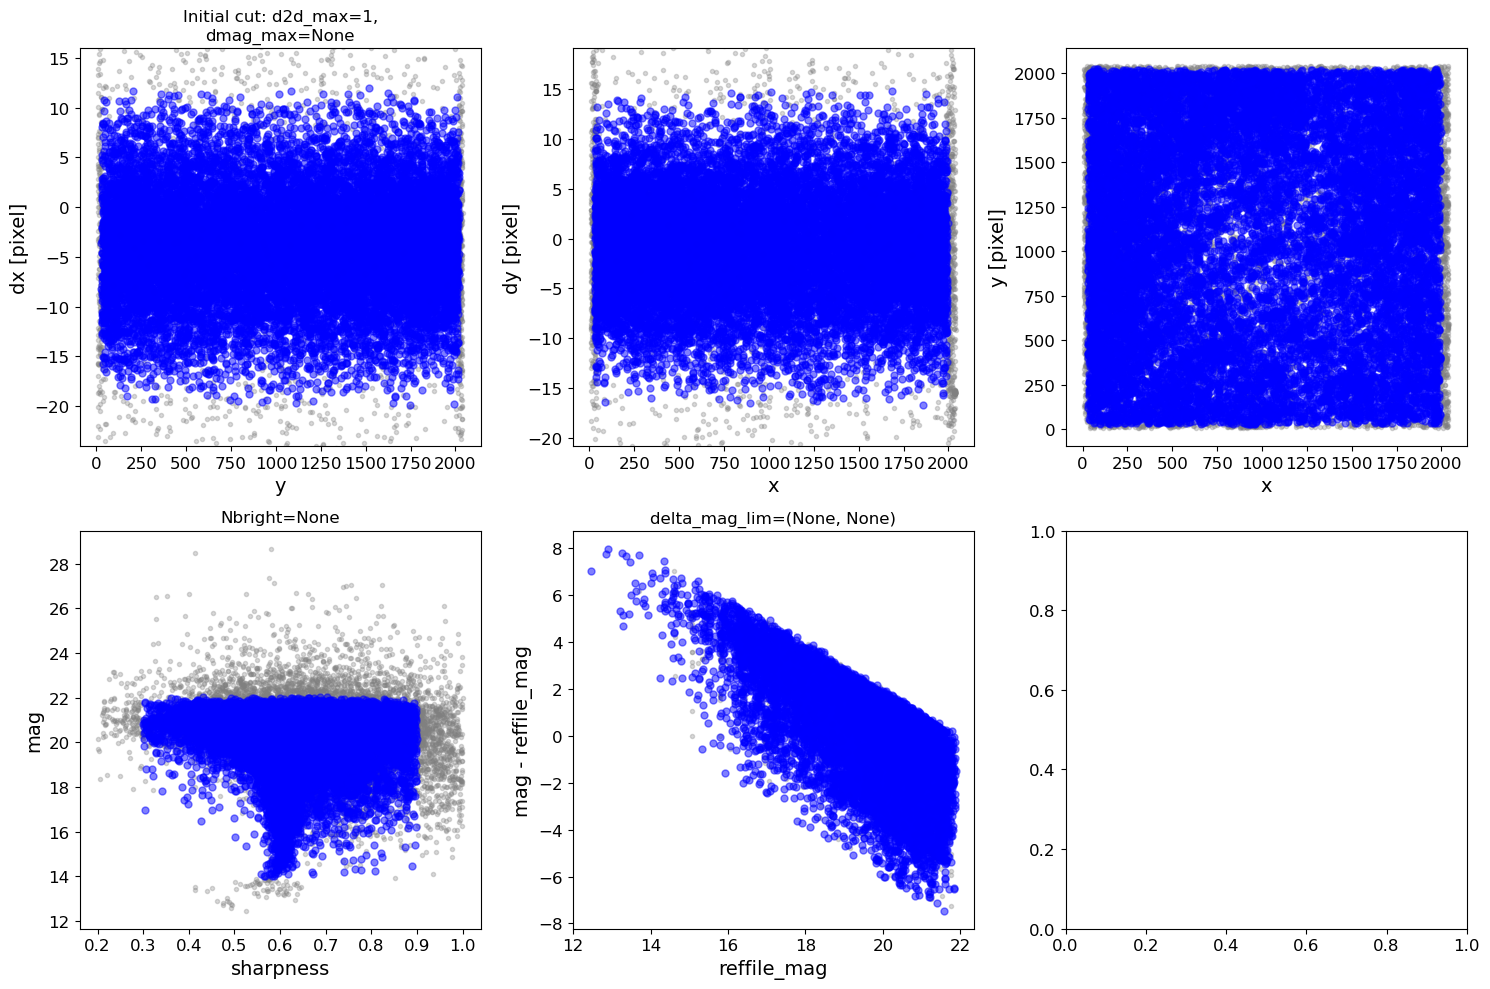

    slope  intercept    maxval  index  d_bestguess  fwhm  multimax
-0.000293        0.3 798.11067     87    -2.999063  11.6     False
Keeping 2185 out of 2185, skippin 0 because of null values in columns d_rot_tmp
median: -2.978553
75.000000 percentile cut: max residual for cut: 0.580790
median: -2.968007
i:00 mean:-2.968007(0.008204) stdev:0.331920(0.005799) X2norm:1.00 Nchanged:0 Ngood:1638 Nclip:547

mean: -2.985522
i:01 mean:-2.985522(0.009626) stdev:0.449842(0.006805) X2norm:1.00 Nchanged:547 Ngood:2185 Nclip:0

mean: -2.985522
i:02 mean:-2.985522(0.009626) stdev:0.449842(0.006805) X2norm:1.00 Nchanged:0 Ngood:2185 Nclip:0


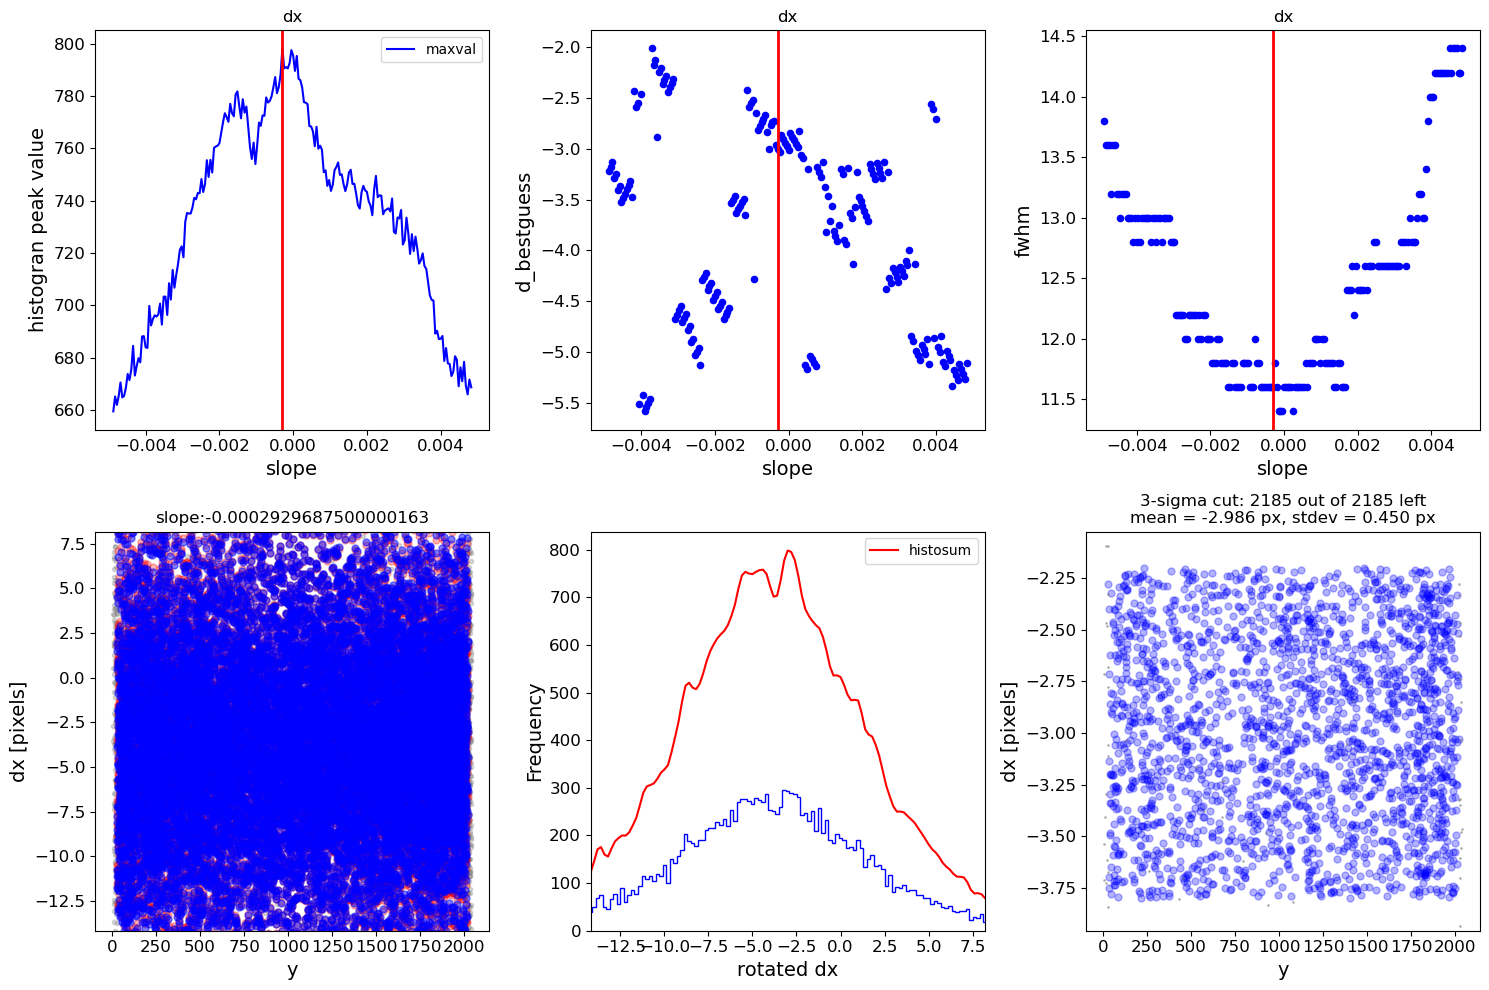

    slope  intercept     maxval  index  d_bestguess  fwhm  multimax
-0.000928       0.95 112.769284     75    -2.295755  10.8     False
Keeping 279 out of 279, skippin 0 because of null values in columns d_rot_tmp
median: -2.305851
75.000000 percentile cut: max residual for cut: 0.538150
median: -2.305851
i:00 mean:-2.305851(0.021489) stdev:0.309918(0.015159) X2norm:1.00 Nchanged:0 Ngood:209 Nclip:70

mean: -2.300577
i:01 mean:-2.300577(0.025775) stdev:0.429759(0.018193) X2norm:1.00 Nchanged:70 Ngood:279 Nclip:0

mean: -2.300577
i:02 mean:-2.300577(0.025775) stdev:0.429759(0.018193) X2norm:1.00 Nchanged:0 Ngood:279 Nclip:0


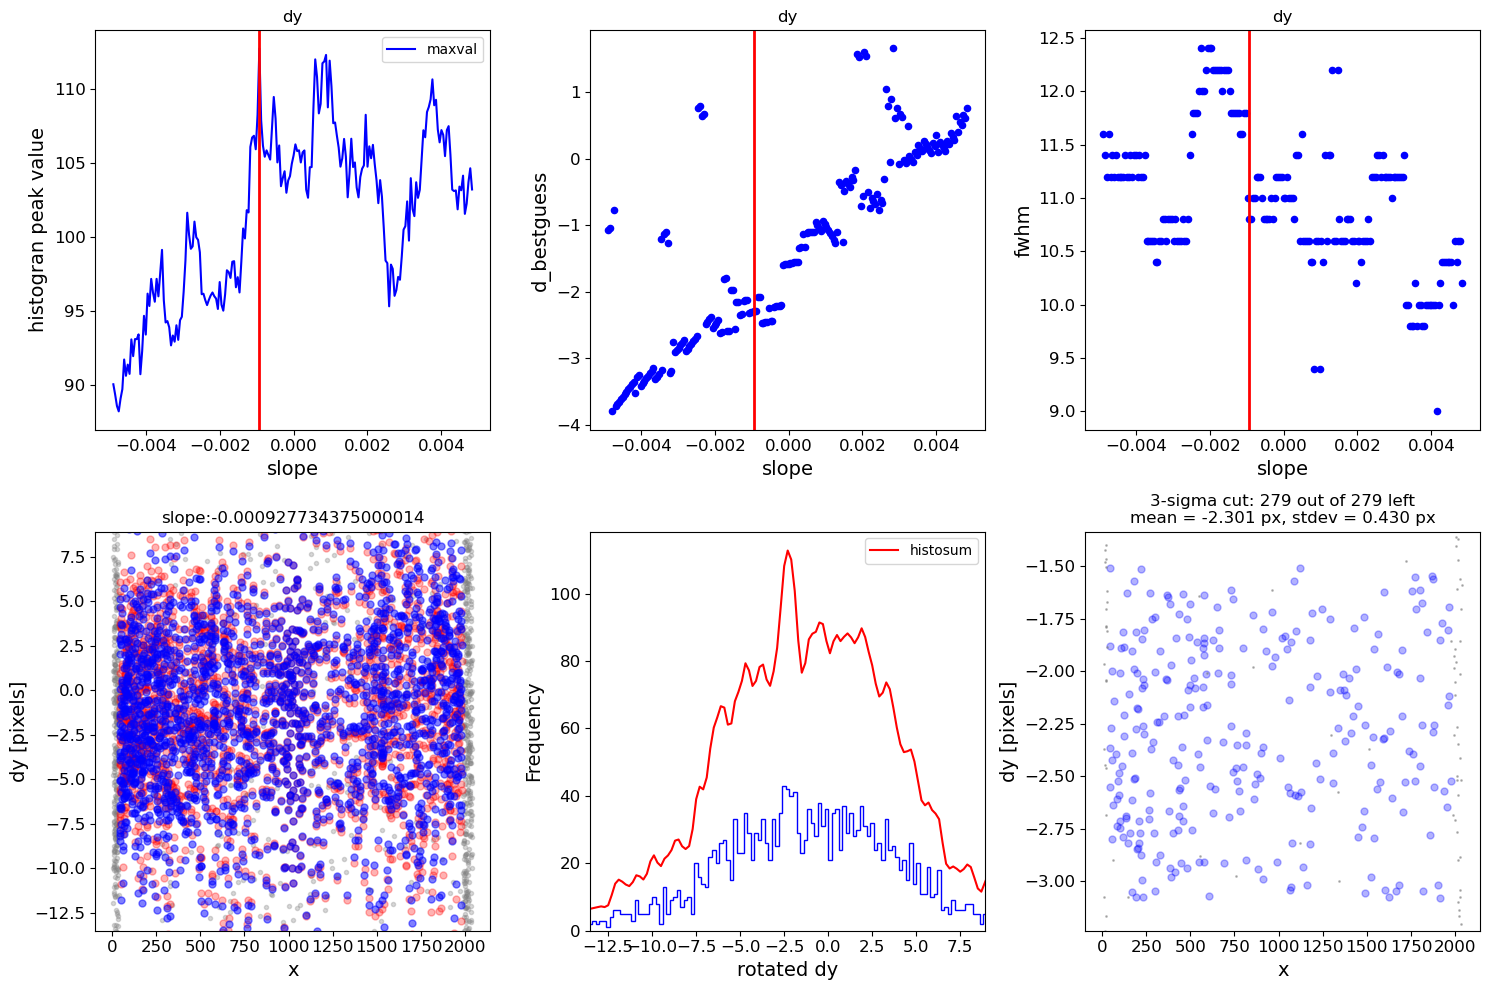

*** Note: close plots to continue!


<Figure size 640x480 with 0 Axes>

2023-08-25 12:32:45,084 - stpipe.TweakRegStep - INFO - TweakRegStep instance created.
2023-08-25 12:32:45,530 - stpipe.TweakRegStep - INFO - Step TweakRegStep running with args ([<ImageModel(2048, 2048) from jw02221002002_02201_00004_nrcalong_destreak_copy.fits>],).
2023-08-25 12:32:45,534 - stpipe.TweakRegStep - INFO - Step TweakRegStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction/jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits', 'output_dir': '.', 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 50, 'brightest': 4000, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 4, 'searchrad': 0.5, 'use2dhist': True, 'separation': 9, 'tolerance':

./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits True
./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits True


2023-08-25 12:32:45,567 - stpipe.TweakRegStep - INFO - 
2023-08-25 12:32:45,568 - stpipe.TweakRegStep - INFO - Number of image groups to be aligned: 1.
2023-08-25 12:32:45,569 - stpipe.TweakRegStep - INFO - Image groups:
2023-08-25 12:32:45,597 - stpipe.TweakRegStep - INFO - * Images in GROUP 'jw02221002002_02201_00004_nrcalong_destreak_copy':
2023-08-25 12:32:45,599 - stpipe.TweakRegStep - INFO -      jw02221002002_02201_00004_nrcalong_destreak_copy
2023-08-25 12:32:45,600 - stpipe.TweakRegStep - INFO - 
2023-08-25 12:32:45,602 - stpipe.TweakRegStep - INFO -  
2023-08-25 12:32:45,603 - stpipe.TweakRegStep - INFO - ***** tweakwcs.imalign.align_wcs() started on 2023-08-25 12:32:45.601994
2023-08-25 12:32:45,604 - stpipe.TweakRegStep - INFO -       Version 0.8.2
2023-08-25 12:32:45,605 - stpipe.TweakRegStep - INFO -  
2023-08-25 12:32:45,675 - stpipe.TweakRegStep - INFO - Aligning image catalog 'GROUP ID: jw02221002002_02201_00004_nrcalong_destreak_copy' to the reference catalog.
2023-08

./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits False
replacing SIP ./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits


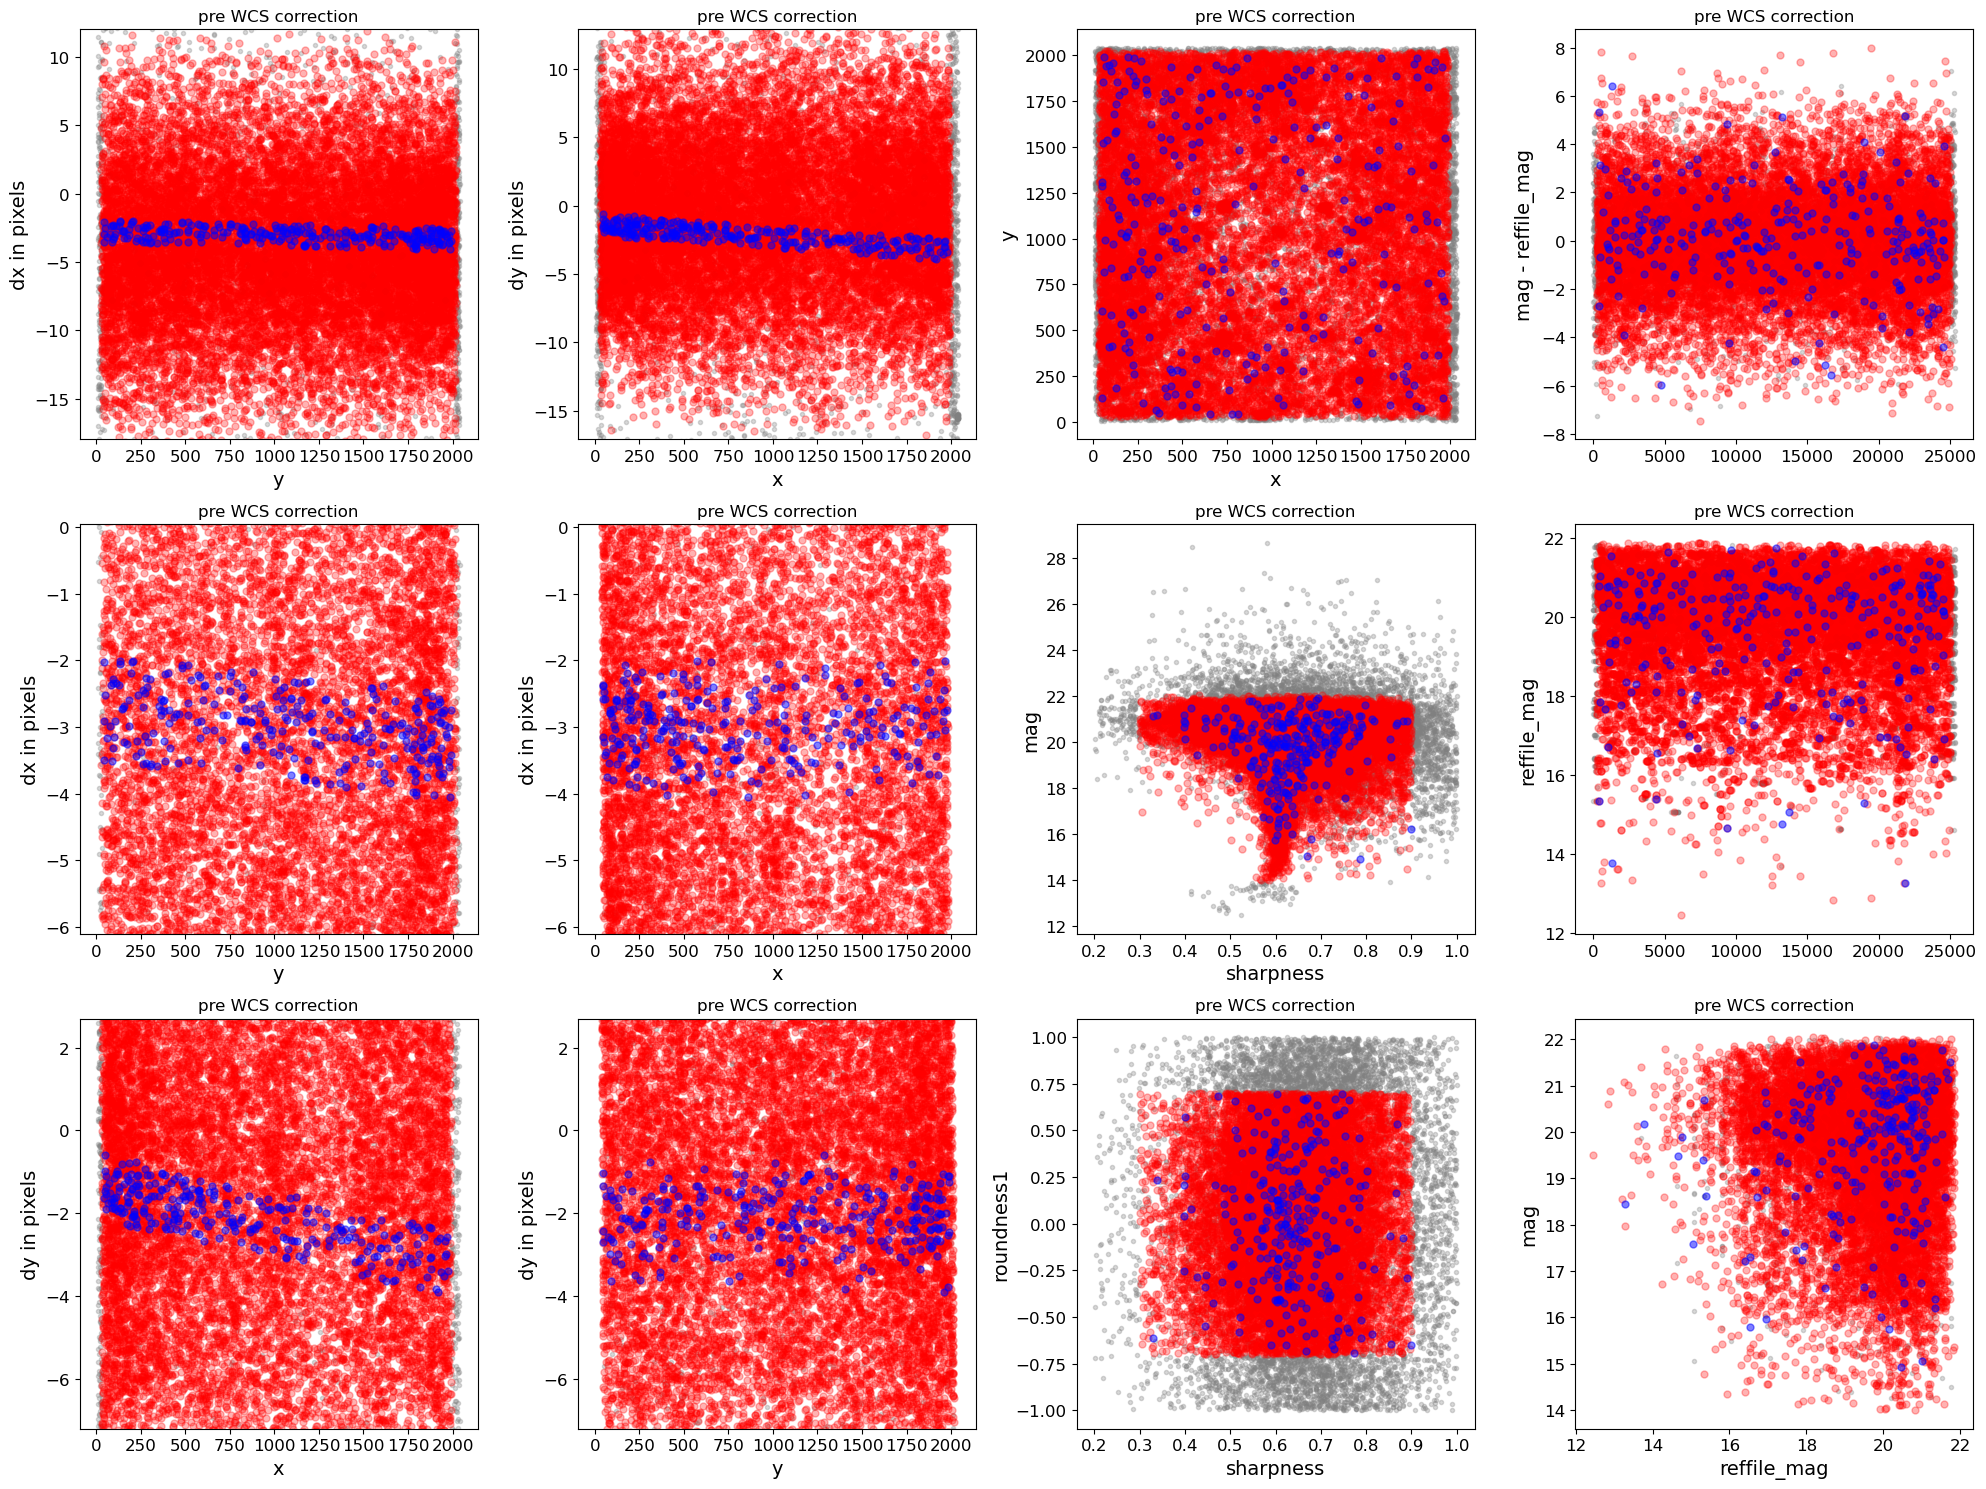

./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits
should be plotting


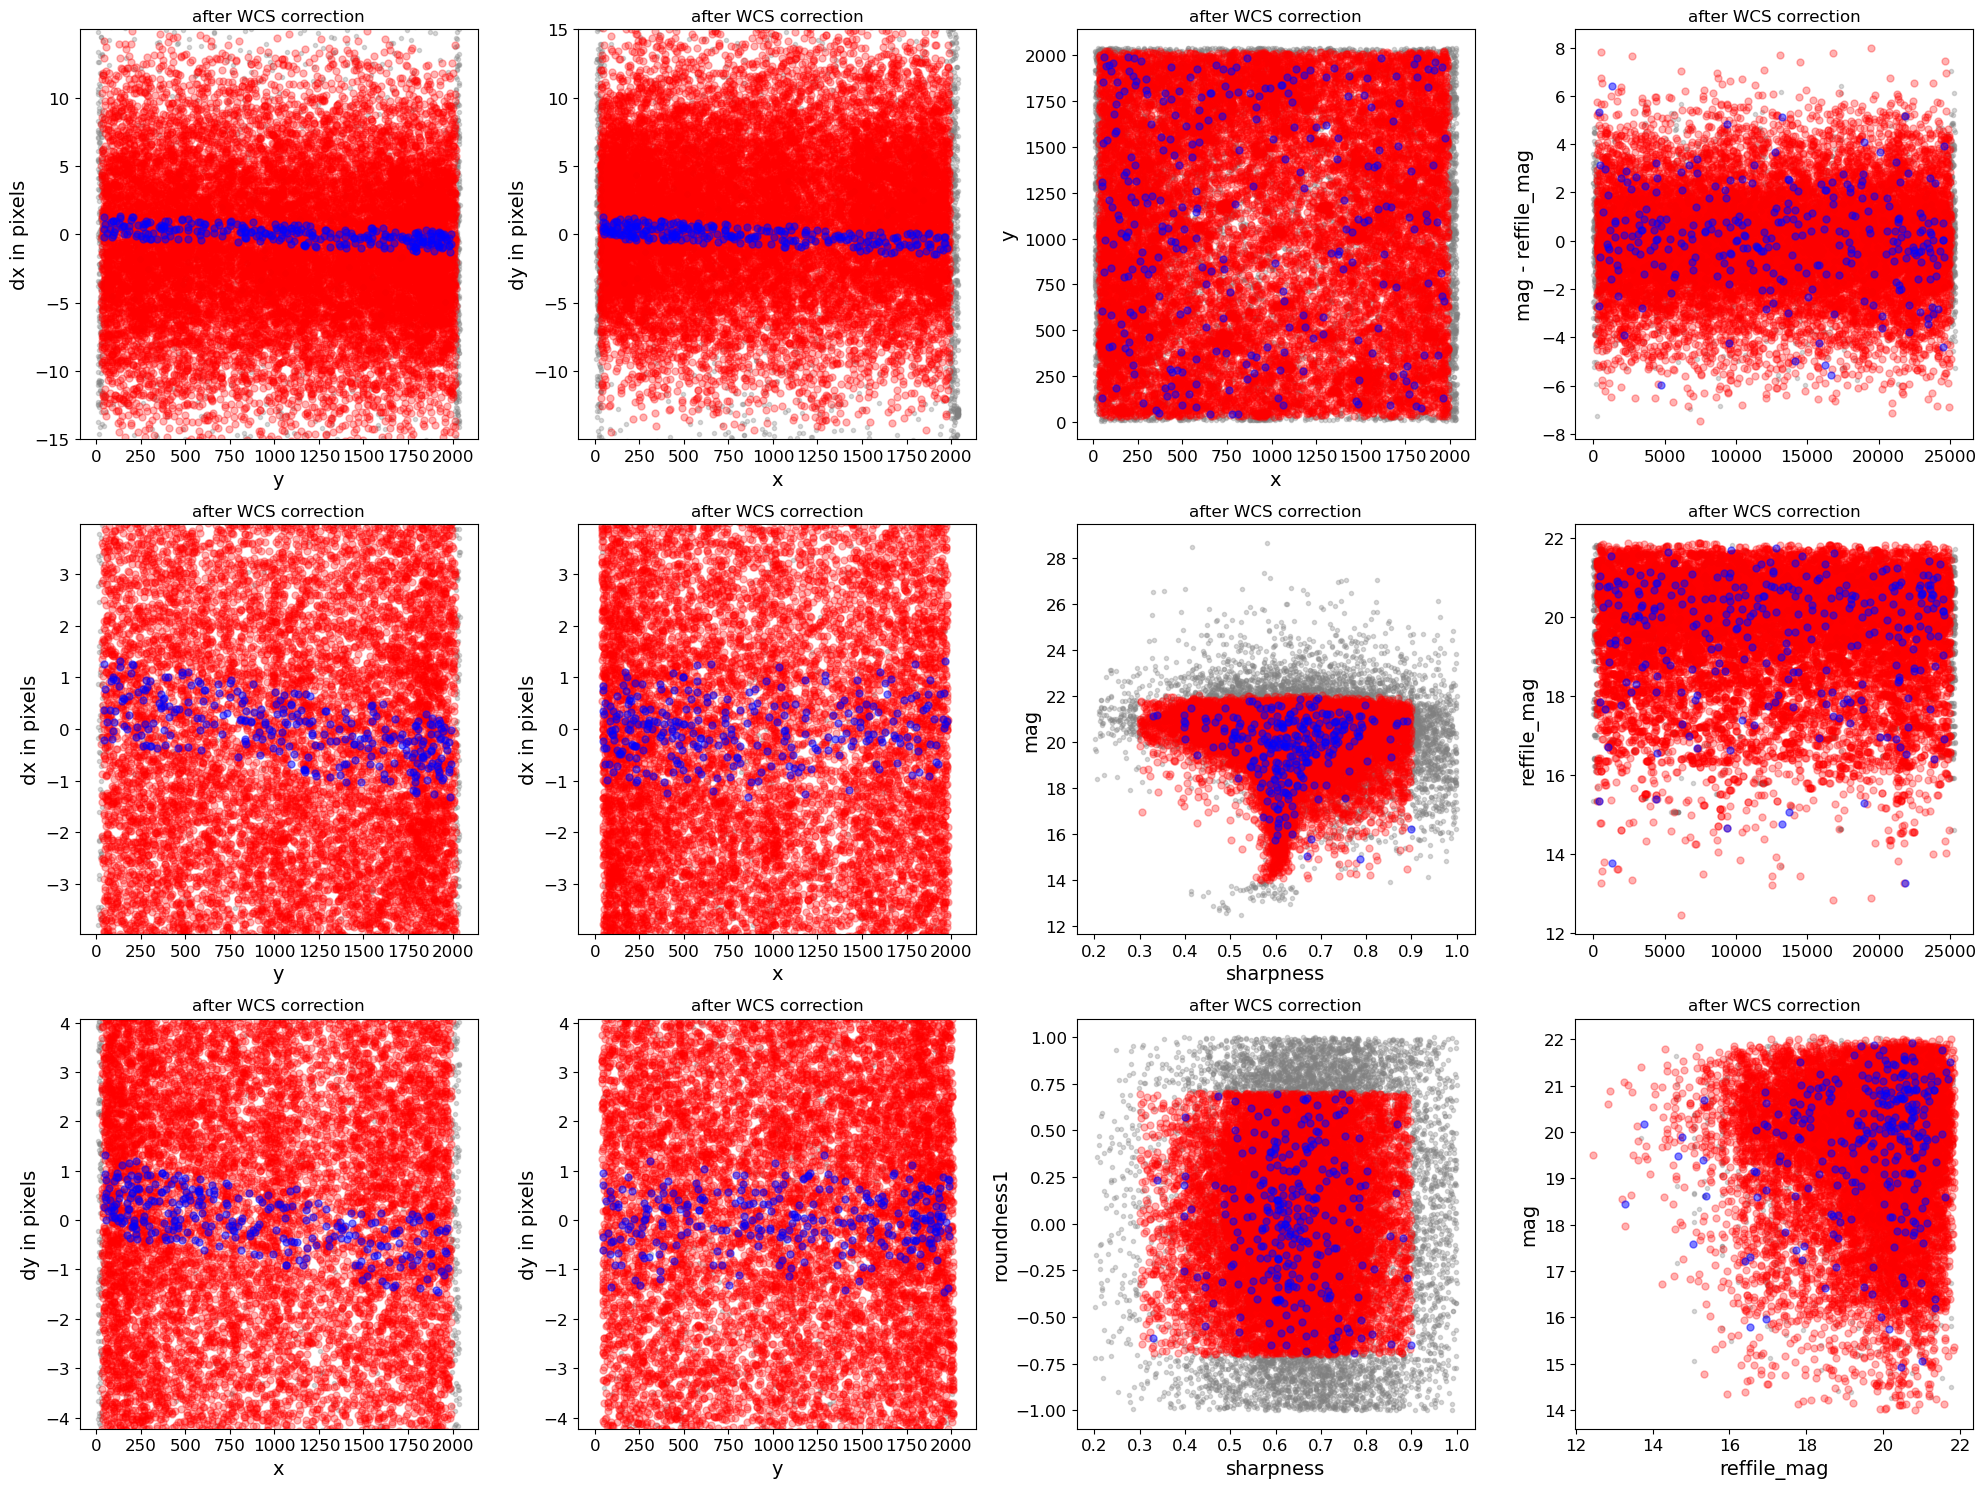

*** Note: close plots to continue!


0

In [17]:
wcs_align = st_wcs_align()


wcs_align.run_all(align_image,
              telescope='jwst',
              #outsubdir='mastDownload',
          refcat_racol='ra',
          refcat_deccol='dec',
          refcat_magcol='mag',
          refcat_magerrcol='dmag',
          overwrite=True,
          d2d_max=1,
          showplots=2,
          refcatname='/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits',
          histocut_order='dxdy',
              sharpness_lim=(0.3,0.9),
              roundness1_lim=(-0.7, 0.7),
              SNR_min= 3,
              dmag_max=1.0,
                xshift=-3.95*u.arcsec,# added to the x coordinate before calculating ra,dec. This can be used to correct for large shifts before matching!
                yshift=-0.9*u.arcsec,
              objmag_lim =(14,24),
            imagetype='cal')

In [19]:
wcs_align = st_wcs_align()

wcs_align.run_all(align_image,
              telescope='jwst',
          overwrite=True,
          d2d_max=.5,
          showplots=0,
          refcatname='/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits',
                  refcat_racol='RAJ2000',
                  refcat_deccol='DEJ2000',
          histocut_order='dxdy',
              sharpness_lim=(0.3,0.9),
              roundness1_lim=(-0.7, 0.7),
              SNR_min= 3,
              dmag_max=1.0,
                  xshift=-3.95*u.arcsec,# added to the x coordinate before calculating ra,dec. This can be used to correct for large shifts before matching!
                  yshift=-0.9*u.arcsec,
              objmag_lim =(14,24),
            imagetype='cal')

0 ./jw02221002002_02201_00004_nrcalong_destreak_copy.phot.txt


2023-08-25 12:39:18,339 - stpipe.SourceCatalogStep - INFO - SourceCatalogStep instance created.
2023-08-25 12:39:18,623 - stpipe.SourceCatalogStep - INFO - Using APCORR reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_apcorr_0004.fits
2023-08-25 12:39:18,636 - stpipe.SourceCatalogStep - INFO - Using ABVEGAOFFSET reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_abvegaoffset_0001.asdf
2023-08-25 12:39:18,637 - stpipe - INFO - Instrument: NIRCAM
2023-08-25 12:39:18,638 - stpipe - INFO - Detector: NRCALONG
2023-08-25 12:39:18,640 - stpipe - INFO - Filter: F444W
2023-08-25 12:39:18,641 - stpipe - INFO - Pupil: F405N
2023-08-25 12:39:18,642 - stpipe - INFO - Subarray: FULL
2023-08-25 12:39:18,677 - stpipe - WARNING - model.meta.resample.pixel_scale_ratio was not found. Assuming the native detector pixel scale (i.e., pixel_scale_ratio = 1)


identified vvvcat
LOADING refcat /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits
RAJ2000
   slope  intercept    maxval  index  d_bestguess  fwhm  multimax
0.001416      -1.45 47.590568     65    -0.714207   9.0     False
Keeping 111 out of 111, skippin 0 because of null values in columns d_rot_tmp
median: -0.692346
75.000000 percentile cut: max residual for cut: 0.562743
median: -0.718067
i:00 mean:-0.718067(0.033116) stdev:0.299878(0.023275) X2norm:0.99 Nchanged:0 Ngood:83 Nclip:28

mean: -0.664973
i:01 mean:-0.664973(0.039974) stdev:0.419255(0.028139) X2norm:1.00 Nchanged:28 Ngood:111 Nclip:0

mean: -0.664973
i:02 mean:-0.664973(0.039974) stdev:0.419255(0.028139) X2norm:1.00 Nchanged:0 Ngood:111 Nclip:0


2023-08-25 12:39:28,930 - stpipe.TweakRegStep - INFO - TweakRegStep instance created.


   slope  intercept   maxval  index  d_bestguess  fwhm  multimax
0.001465       -1.5 11.06612     16    -5.810839   1.0     False
Keeping 20 out of 20, skippin 0 because of null values in columns d_rot_tmp
median: -5.802760
75.000000 percentile cut: max residual for cut: 0.603987
median: -5.787706
i:00 mean:-5.787706(0.066827) stdev:0.250045(0.045652) X2norm:0.96 Nchanged:0 Ngood:15 Nclip:5

mean: -5.735123
i:01 mean:-5.735123(0.080650) stdev:0.322598(0.055325) X2norm:1.00 Nchanged:2 Ngood:17 Nclip:3

mean: -5.859509
i:02 mean:-5.859509(0.097328) stdev:0.424244(0.067079) X2norm:1.00 Nchanged:3 Ngood:20 Nclip:0

mean: -5.859509
i:03 mean:-5.859509(0.097328) stdev:0.424244(0.067079) X2norm:1.00 Nchanged:0 Ngood:20 Nclip:0
./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits True
./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits True


2023-08-25 12:39:29,404 - stpipe.TweakRegStep - INFO - Step TweakRegStep running with args ([<ImageModel(2048, 2048) from jw02221002002_02201_00004_nrcalong_destreak_copy.fits>],).
2023-08-25 12:39:29,409 - stpipe.TweakRegStep - INFO - Step TweakRegStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction/jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits', 'output_dir': '.', 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 50, 'brightest': 4000, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 4, 'searchrad': 0.5, 'use2dhist': True, 'separation': 9, 'tolerance': 0.7, 'xoffset': 0, 'yoffset': 0, 'fitgeometry': 'rshift', 'nclip': 3, 'sigma': 3.0, '

./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits False
replacing SIP ./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits
./jw02221002002_02201_00004_nrcalong_destreak_copy_jhat.fits
should be plotting


0

In [ ]:
#wcs_align = st_wcs_align()
#
#for f in files:
#    wcs_align.run_all(f,
#              telescope='jwst',
#              #outsubdir='mastDownload',
#          refcat_racol='ra',
#          refcat_deccol='dec',
#          refcat_magcol='mag',
#          refcat_magerrcol='dmag',
#          overwrite=True,
#          d2d_max=1,
#          showplots=2,
#          refcatname=ref_catname,
#          histocut_order='dxdy',
#              sharpness_lim=(0.3,0.9),
#              roundness1_lim=(-0.7, 0.7),
#              SNR_min= 3,
#              dmag_max=1.0,
#              objmag_lim =(14,24),
#            imagetype='cal')

In [27]:
align_image = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00001_nrcalong_destreak.fits'

In [28]:
wcs_align = st_wcs_align()

wcs_align.run_all(align_image,
              telescope='jwst',
          overwrite=True,
          d2d_max=.5,
          showplots=0,
          refcatname='/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits',
                  refcat_racol='RAJ2000',
                  refcat_deccol='DEJ2000',
          histocut_order='dxdy',
              sharpness_lim=(0.3,0.9),
              roundness1_lim=(-0.7, 0.7),
              SNR_min= 3,
              dmag_max=1.0,
              objmag_lim =(14,24),
            imagetype='cal')

0 ./jw02221002001_08201_00001_nrcalong.phot.txt


2023-08-24 16:51:08,316 - stpipe.SourceCatalogStep - INFO - SourceCatalogStep instance created.
2023-08-24 16:51:08,633 - stpipe.SourceCatalogStep - INFO - Using APCORR reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_apcorr_0004.fits
2023-08-24 16:51:08,648 - stpipe.SourceCatalogStep - INFO - Using ABVEGAOFFSET reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_abvegaoffset_0001.asdf
2023-08-24 16:51:08,650 - stpipe - INFO - Instrument: NIRCAM
2023-08-24 16:51:08,651 - stpipe - INFO - Detector: NRCALONG
2023-08-24 16:51:08,653 - stpipe - INFO - Filter: F444W
2023-08-24 16:51:08,655 - stpipe - INFO - Pupil: F405N
2023-08-24 16:51:08,657 - stpipe - INFO - Subarray: FULL
2023-08-24 16:51:08,696 - stpipe - WARNING - model.meta.resample.pixel_scale_ratio was not found. Assuming the native detector pixel scale (i.e., pixel_scale_ratio = 1)


identified vvvcat
LOADING refcat /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits
RAJ2000
    slope  intercept    maxval  index  d_bestguess  fwhm  multimax
-0.001318       1.35 52.510973     34    -2.372653  10.4     False
Keeping 129 out of 129, skippin 0 because of null values in columns d_rot_tmp
median: -2.315895
75.000000 percentile cut: max residual for cut: 0.582619
median: -2.307745
i:00 mean:-2.307745(0.032186) stdev:0.313714(0.022640) X2norm:0.99 Nchanged:0 Ngood:96 Nclip:33

mean: -2.338904
i:01 mean:-2.338904(0.039987) stdev:0.452404(0.028165) X2norm:1.00 Nchanged:33 Ngood:129 Nclip:0

mean: -2.338904
i:02 mean:-2.338904(0.039987) stdev:0.452404(0.028165) X2norm:1.00 Nchanged:0 Ngood:129 Nclip:0


2023-08-24 16:51:20,637 - stpipe.TweakRegStep - INFO - TweakRegStep instance created.


   slope  intercept    maxval  index  d_bestguess  fwhm  multimax
0.001221      -1.25 11.101823     43    -0.307179   0.8     False
Keeping 18 out of 18, skippin 0 because of null values in columns d_rot_tmp
median: -0.321160
75.000000 percentile cut: max residual for cut: 0.425779
median: -0.312504
i:00 mean:-0.312504(0.050345) stdev:0.174400(0.034203) X2norm:0.96 Nchanged:0 Ngood:13 Nclip:5

mean: -0.331515
i:01 mean:-0.331515(0.057269) stdev:0.206485(0.039022) X2norm:1.00 Nchanged:1 Ngood:14 Nclip:4

mean: -0.295817
i:02 mean:-0.295817(0.077139) stdev:0.308554(0.052917) X2norm:1.00 Nchanged:3 Ngood:17 Nclip:1

mean: -0.340272
i:03 mean:-0.340272(0.085810) stdev:0.353804(0.058967) X2norm:1.00 Nchanged:1 Ngood:18 Nclip:0

mean: -0.340272
i:04 mean:-0.340272(0.085810) stdev:0.353804(0.058967) X2norm:1.00 Nchanged:0 Ngood:18 Nclip:0


2023-08-24 16:51:21,119 - stpipe.TweakRegStep - INFO - Step TweakRegStep running with args ([<ImageModel(2048, 2048) from jw02221002001_08201_00001_nrcalong_destreak.fits>],).


./jw02221002001_08201_00001_nrcalong_jhat.fits False
./jw02221002001_08201_00001_nrcalong_jhat.fits False


2023-08-24 16:51:21,123 - stpipe.TweakRegStep - INFO - Step TweakRegStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction/jw02221002001_08201_00001_nrcalong_jhat.fits', 'output_dir': '.', 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 50, 'brightest': 4000, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 4, 'searchrad': 0.5, 'use2dhist': True, 'separation': 9, 'tolerance': 0.7, 'xoffset': 0, 'yoffset': 0, 'fitgeometry': 'rshift', 'nclip': 3, 'sigma': 3.0, 'align_to_gaia': False, 'gaia_catalog': 'GAIADR2', 'min_gaia': 30, 'save_gaia_catalog': False, 'telescope': 'jwst'}
2023-08-24 16:51:21,142 - stpipe.TweakRegStep - INFO - NUMBER OF IMAGES: 1
2023-

./jw02221002001_08201_00001_nrcalong_jhat.fits False


RuntimeError: Image ./jw02221002001_08201_00001_nrcalong_jhat.fits did not get created!!

In [5]:
cal_files = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/*_destreak.fits')
#fn = '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002001_08201_00004_nrcblong_destreak_copy.fits'
cal_files[2]

'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak.fits'

In [6]:
cal_files = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201*nrca*destreak.fits')
cal_files

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00003_nrcalong_destreak.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00004_nrcalong_destreak.fits']

In [5]:
for f in cal_files:
    edit = f.split('.')[0]+'_copy.fits'
    shutil.copy(f, edit)

In [6]:
cal_files_copy = glob('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201**nrcalong_destreak_copy.fits')
cal_files_copy

['/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_copy.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00002_nrcalong_destreak_copy.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00004_nrcalong_destreak_copy.fits',
 '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00003_nrcalong_destreak_copy.fits']

In [7]:
#edited = cal_files[2].split('.')[0]+'_copy.fits'
#shutil.copy(cal_files[2], edited)
#fn = edited

In [8]:
#ref_image = fn
#
#ref_fits = fits.open(ref_image)
#ref_data = fits.open(ref_image)['SCI',1].data
#norm1 = simple_norm(ref_data, stretch='log')
#
#plt.imshow(np.nan_to_num(ref_data), origin='lower',
#                      norm=norm1)
#plt.gca().tick_params(labelcolor='none',axis='both',color='none')
#plt.show()

In [9]:
#star_location = SkyCoord('17:46:21.6268154892','-28:32:21.2197172093',unit=(u.hourangle,u.deg))
#align_image = fn
#align_fits = fits.open(align_image)
#align_fits['SCI',1].header['CRPIX1']+=1
#align_fits['SCI',1].header['CRPIX2']+=1
#align_fits.writeto(align_image,overwrite=True)
#
#align_data = fits.open(align_image)['SCI',1].data
#ref_y,ref_x = skycoord_to_pixel(star_location,wcs.WCS(ref_fits['SCI',1],ref_fits))
#align_y,align_x = skycoord_to_pixel(star_location,wcs.WCS(align_fits['SCI',1],align_fits))
#
#ref_cutout = extract_array(ref_data,(11,11),(ref_x,ref_y))
#align_cutout = extract_array(align_data,(11,11),(align_x,align_y))
#norm1 = simple_norm(ref_cutout,stretch='log')
#norm2 = simple_norm(align_cutout,stretch='log')
#fig,axes = plt.subplots(1,2)
#axes[0].imshow(ref_cutout, origin='lower',
#                      norm=norm1,cmap='gray')
#axes[1].imshow(align_cutout, origin='lower',
#                      norm=norm2,cmap='gray')
#axes[0].set_title('Reference')
#axes[1].set_title('To Align')
#axes[0].tick_params(labelcolor='none',axis='both',color='none')
#axes[1].tick_params(labelcolor='none',axis='both',color='none')
#
#plt.show()

In [10]:
#jwst_phot = jwst_photclass()
#jwst_phot.run_phot(imagename=ref_image,photfilename='auto',overwrite=True,ee_radius=80,imagetype='cal')
#ref_catname = ref_image.replace('.fits','.phot.txt') # the default
#refcat = Table.read(ref_catname,format='ascii')
#print(refcat)

In [11]:
#wcs_align = st_wcs_align()
#
#
#wcs_align.run_all(align_image,
#                  telescope='jwst',
#                  #outsubdir='mastDownload',
#                  refcat_racol='ra',
#                  refcat_deccol='dec',
#                  refcat_magcol='mag',
#                  refcat_magerrcol='dmag',
#                  overwrite=True,
#                  d2d_max=1,
#                  showplots=2,
#                  refcatname=ref_catname,
#                  histocut_order='dxdy',
#                  sharpness_lim=(0.3,0.9),
#                  roundness1_lim=(-0.7, 0.7),
#                  SNR_min= 3,
#                  dmag_max=1.0,
#                  objmag_lim =(14,24),
#                  imagetype='cal',
#                  outrootdir='/orange/adamginsburg/jwst/cloudc/F405N/pipeline',
#                  )

In [29]:
#os.path.join('mastDownload',os.path.basename(align_image).replace('cal.fits','jhat.fits'))

'mastDownload/jw02221002002_08201_00001_nrcalong_destreak_copy.fits'

In [30]:
#print('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits')

/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits


In [31]:
#import pandas as pd

In [13]:
#'vvvcat' in os.path.basename('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits')

In [14]:
#pd.read_table()
Table.read('/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits').to_pandas().columns

Index(['RAJ2000', 'DEJ2000', 'iauname', 'mClass', 'Zmag3', 'e_Zmag3',
       'Zperrbits', 'Ymag3', 'e_Ymag3', 'Yperrbits', 'Jmag3', 'e_Jmag3',
       'Jperrbits', 'Hmag3', 'e_Hmag3', 'Hperrbits', 'Ksmag3', 'e_Ksmag3',
       'Ksperrbits', 'RA', 'DEC', 'skycoord.ra', 'skycoord.dec'],
      dtype='object')

In [15]:
wcs_align = st_wcs_align()

In [16]:
cal_files_copy[0]

'/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_copy.fits'

In [18]:
wcs_align.run_all(cal_files_copy[0],
                  telescope='jwst',
                  #outsubdir='mastDownload',
                  overwrite=True,
                  d2d_max=.5,
                  showplots=0,
                  refcatname='/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits',
                  histocut_order='dxdy',
                  sharpness_lim=(0.3,0.9),
                  roundness1_lim=(-0.7, 0.7),
                  SNR_min= 3,
                  dmag_max=1.0,
                  objmag_lim =(14,24),
                  imagetype='cal',
                  outrootdir='/orange/adamginsburg/jwst/cloudc/F405N/pipeline',
                  refcat_racol='RAJ2000',
                  refcat_deccol='DEJ2000',
                  xshift=-8*u.arcsec
                  )



0 /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak.phot.txt


2023-08-08 17:40:59,451 - stpipe.SourceCatalogStep - INFO - SourceCatalogStep instance created.
2023-08-08 17:40:59,689 - stpipe.SourceCatalogStep - INFO - Using APCORR reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_apcorr_0004.fits
2023-08-08 17:40:59,698 - stpipe.SourceCatalogStep - INFO - Using ABVEGAOFFSET reference file: /orange/adamginsburg/jwst/brick/crds/references/jwst/nircam/jwst_nircam_abvegaoffset_0001.asdf
2023-08-08 17:40:59,699 - stpipe - INFO - Instrument: NIRCAM
2023-08-08 17:40:59,700 - stpipe - INFO - Detector: NRCALONG
2023-08-08 17:40:59,701 - stpipe - INFO - Filter: F444W
2023-08-08 17:40:59,702 - stpipe - INFO - Pupil: F405N
2023-08-08 17:40:59,703 - stpipe - INFO - Subarray: FULL
2023-08-08 17:40:59,729 - stpipe - WARNING - model.meta.resample.pixel_scale_ratio was not found. Assuming the native detector pixel scale (i.e., pixel_scale_ratio = 1)


identified vvvcat
LOADING refcat /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221-o002_t001_nircam_clear-f405n-merged_vvvcat.fits
RAJ2000
    slope  intercept    maxval  index  d_bestguess  fwhm  multimax
-0.004248       4.35 63.111203     55    -8.895287   8.6     False
Keeping 151 out of 151, skippin 0 because of null values in columns d_rot_tmp
median: -8.870005
75.000000 percentile cut: max residual for cut: 0.522983
median: -8.854498
i:00 mean:-8.854498(0.028150) stdev:0.297913(0.019817) X2norm:1.00 Nchanged:0 Ngood:113 Nclip:38

mean: -8.886543
i:01 mean:-8.886543(0.034705) stdev:0.425051(0.024459) X2norm:1.00 Nchanged:38 Ngood:151 Nclip:0

mean: -8.886543
i:02 mean:-8.886543(0.034705) stdev:0.425051(0.024459) X2norm:1.00 Nchanged:0 Ngood:151 Nclip:0


2023-08-08 17:41:08,131 - stpipe.TweakRegStep - INFO - TweakRegStep instance created.


    slope  intercept    maxval  index  d_bestguess  fwhm  multimax
-0.000732       0.75 14.179388     28    -2.313877   1.4     False
Keeping 26 out of 26, skippin 0 because of null values in columns d_rot_tmp
median: -2.363457
75.000000 percentile cut: max residual for cut: 0.419230
median: -2.299918
i:00 mean:-2.299918(0.058434) stdev:0.247913(0.040217) X2norm:0.97 Nchanged:0 Ngood:19 Nclip:7

mean: -2.411598
i:01 mean:-2.411598(0.071420) stdev:0.357101(0.049521) X2norm:1.00 Nchanged:7 Ngood:26 Nclip:0

mean: -2.411598
i:02 mean:-2.411598(0.071420) stdev:0.357101(0.049521) X2norm:1.00 Nchanged:0 Ngood:26 Nclip:0


2023-08-08 17:41:08,497 - stpipe.TweakRegStep - INFO - Step TweakRegStep running with args ([<ImageModel(2048, 2048) from jw02221002002_08201_00001_nrcalong_destreak_copy.fits>],).
2023-08-08 17:41:08,500 - stpipe.TweakRegStep - INFO - Step TweakRegStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_jhat.fits', 'output_dir': '/orange/adamginsburg/jwst/cloudc/F405N/pipeline', 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 50, 'brightest': 4000, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 4, 'searchrad': 0.5, 'use2dhist': True, 'separation': 9, 'tolerance': 0.7, 'xoffset': 0, 'yoffset': 0, 'fitgeometry': 'rshift', 'nclip': 3, 'sigma

/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_jhat.fits False
/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_jhat.fits False


2023-08-08 17:41:08,550 - stpipe.TweakRegStep - INFO - * Images in GROUP 'jw02221002002_08201_00001_nrcalong_destreak_copy':
2023-08-08 17:41:08,551 - stpipe.TweakRegStep - INFO -      jw02221002002_08201_00001_nrcalong_destreak_copy
2023-08-08 17:41:08,552 - stpipe.TweakRegStep - INFO - 
2023-08-08 17:41:08,553 - stpipe.TweakRegStep - INFO -  
2023-08-08 17:41:08,554 - stpipe.TweakRegStep - INFO - ***** tweakwcs.imalign.align_wcs() started on 2023-08-08 17:41:08.553844
2023-08-08 17:41:08,555 - stpipe.TweakRegStep - INFO -       Version 0.8.2
2023-08-08 17:41:08,556 - stpipe.TweakRegStep - INFO -  
2023-08-08 17:41:08,578 - stpipe.TweakRegStep - INFO - Aligning image catalog 'GROUP ID: jw02221002002_08201_00001_nrcalong_destreak_copy' to the reference catalog.
2023-08-08 17:41:08,718 - stpipe.TweakRegStep - INFO - No matching of sources from 'GROUP ID: jw02221002002_08201_00001_nrcalong_destreak_copy' catalog with sources from the reference 'Unnamed' catalog was requested.
2023-08-08 

/orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_jhat.fits False


RuntimeError: Image /orange/adamginsburg/jwst/cloudc/F405N/pipeline/jw02221002002_08201_00001_nrcalong_destreak_jhat.fits did not get created!!

In [ ]:
aligned_image = os.path.basename(align_image).replace('.fits','jhat.fits')
aligned_fits = fits.open(aligned_image)
aligned_data = fits.open(aligned_image)['SCI',1].data
aligned_y,aligned_x = skycoord_to_pixel(star_location,wcs.WCS(aligned_fits['SCI',1],aligned_fits))
aligned_cutout = extract_array(aligned_data,(11,11),(aligned_x,aligned_y))

norm3 = simple_norm(aligned_cutout,stretch='linear',min_cut=-.5,max_cut=3)
fig,axes = plt.subplots(1,2)
axes[0].imshow(align_cutout, origin='lower',
                      norm=norm2,cmap='gray')
axes[1].imshow(aligned_cutout, origin='lower',
                      norm=norm3,cmap='gray')
axes[0].set_title('To Align')
axes[1].set_title('Aligned')
for i in range(2):
    axes[i].tick_params(labelcolor='none',axis='both',color='none')


plt.show()